In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from PIL import Image
from sklearn.cluster import KMeans
from skimage.filters import sobel
import skimage
import warnings
warnings.filterwarnings("ignore")

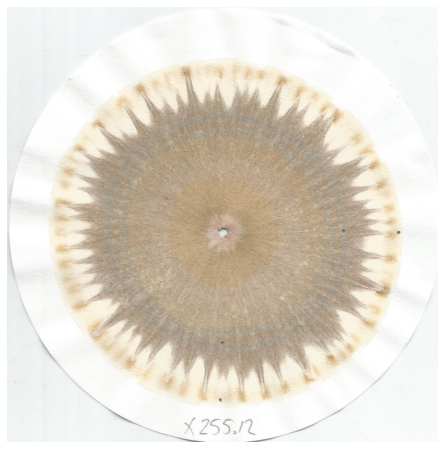

In [ ]:
x=plt.imread('1849084.png')
plt.figure(figsize=(18,8))
plt.imshow(x)
plt.axis("off")
plt.show()

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from PIL import Image
from sklearn.cluster import KMeans
from skimage.filters import sobel
import skimage
import warnings
warnings.filterwarnings("ignore")

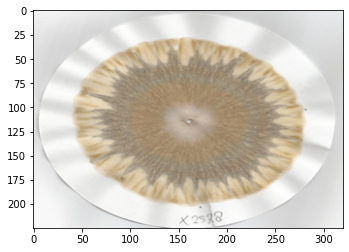

In [ ]:
image=Image.open('1903123.png')
image=image.resize((320,225))
image=np.array(image)
plt.imshow(image)

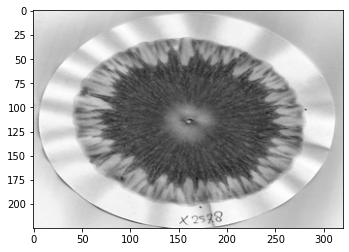

In [ ]:
# Making the gray scale of the image
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

Separates the objects into different regions based on some threshold value(s).

In [ ]:
# What if we use the mean of the pixels in the whole image as threshold and kinda use it for segmentation
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean() :
        arr[i]=1
    else:
        arr[i]=0
gray_segmented=arr.reshape(gray.shape[0],gray.shape[1])

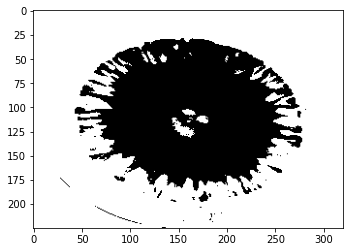

In [ ]:
plt.imshow(gray_segmented,cmap='gray')

# Region based Segmentaion of the image (5 Folds)

In [ ]:
# What if we tune the above function more??
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[i]=4
    elif arr[i]>=0.75:
        arr[i]=3
    elif arr[i]>0.5 :
        arr[i]=2
    elif arr[i]>0.25:
        arr[i]=1
    else:
        arr[i]=0
gray_segmented_2=arr.reshape(gray.shape[0],gray.shape[1])
    

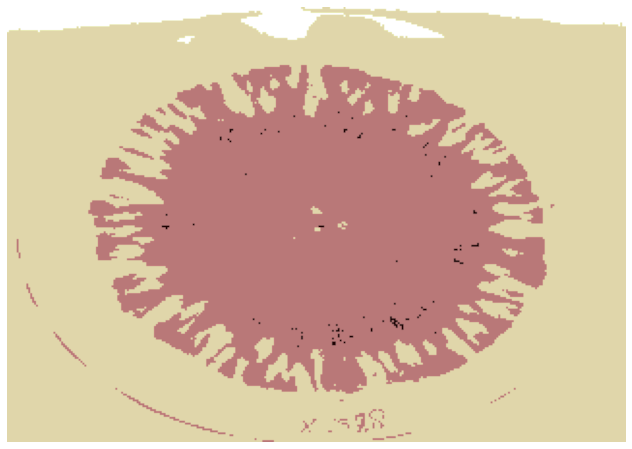

In [ ]:
# There are 5 segments in the below image :)
plt.figure(figsize=(18,8))
plt.imshow(gray_segmented_2,cmap='pink')
plt.axis("off")
plt.show()

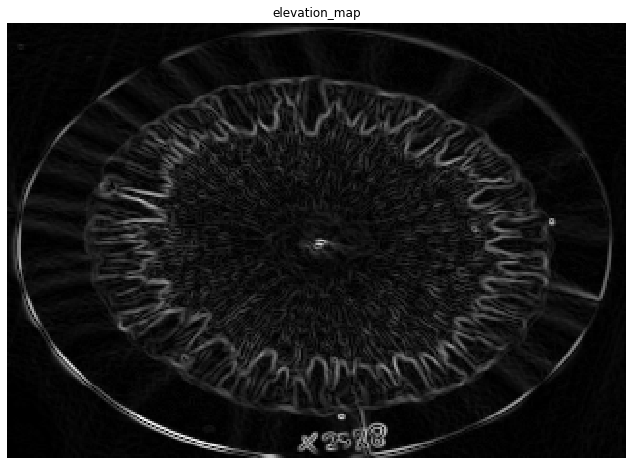

In [ ]:
imm=image[:,:,0]
elevation_map = sobel(imm)

fig, ax = plt.subplots(figsize=(18,8))
ax.imshow(elevation_map, cmap='gray', interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')
plt.show()

## Getting the extreme parts of the image using histogram

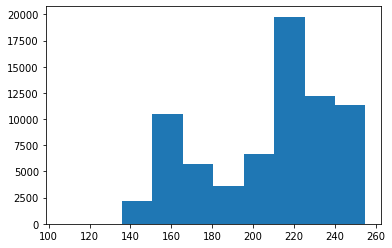

In [ ]:
plt.hist(imm.flatten())
plt.show()

Text(0.5, 1.0, 'markers')

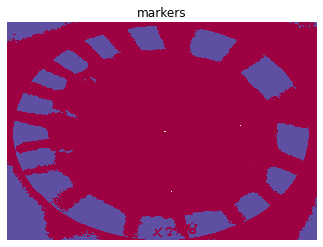

In [ ]:
markers = np.zeros_like(imm)
markers[imm < 117] = 1
markers[imm > 232] = 2

fig, ax = plt.subplots(figsize=(8,4))
ax.imshow(markers, cmap='Spectral', interpolation='nearest')
ax.axis('off')
ax.set_title('markers')


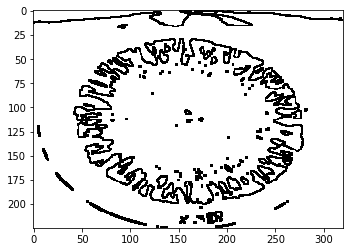

In [ ]:
# we are gonna use kernel laplace here to discover the edges in the image :)
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

out_l = ndimage.convolve(gray_segmented_2, kernel_laplace, mode='reflect')
arr=[]
for i in out_l.flatten():
    if i == 0:
        arr.append(0)
    else:
        arr.append(-100)
arr=np.array(arr)
arr=arr.reshape(out_l.shape[0],out_l.shape[1])
plt.imshow(arr,cmap='gray', interpolation='nearest')

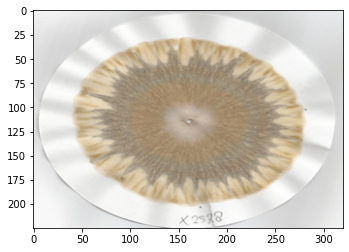

In [ ]:
image=Image.open('1903123.png')
image=image.resize((320,225))
image=np.array(image)
plt.imshow(image)
im=image/255
pic=im.reshape(im.shape[0]*im.shape[1],im.shape[2])

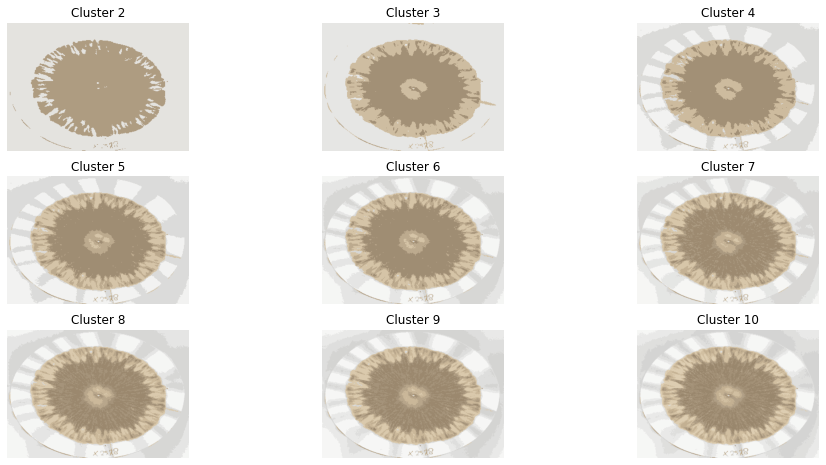

In [ ]:
# Since we know 5 segments was looking great on the image we are gonna do 5 clusters here but you can try more too :)
fig, ax = plt.subplots(3, 3, figsize=(16, 8))
count=1
for i in range(3):
    for j in range(3):

        kmeans = KMeans(n_clusters=count+1, random_state=0).fit(pic)
        pic_print = kmeans.cluster_centers_[kmeans.labels_]
        clustered_pic=pic_print.reshape(im.shape[0],im.shape[1],im.shape[2])
        count+=1
        ax[i][j].set_title('Cluster '+str(count))
        ax[i][j].imshow(clustered_pic)
        ax[i][j].set_axis_off()
plt.show()